# Veri Görselleştirme
Tahmini süre: 45 dakika

Bu laboratuvar çalışmasında veri görselleştirmeye odaklanacaksınız. Veri seti bir RDBMS aracılığıyla sağlanacak ve gerekli verileri çıkarmak için SQL sorguları kullanmanız gerekecektir.

Hedefler
Bu laboratuvar çalışmasını tamamladıktan sonra şunları yapabileceksiniz:

Verilerin dağılımını görselleştirmek.

İki özellik arasındaki ilişkiyi görselleştirmek.

Verilerin bileşimini ve karşılaştırmasını görselleştirmek.



# Demo: Veritabanıyla nasıl çalışılır?
Veritabanı dosyasını indirin.

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-27 10:48:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.0MB/s    in 2.0s    

2026-01-27 10:48:29 (76.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



***Gerekli Python Kütüphanelerini Kurun ve İçe Aktarın***

SQLite ve Pandas ile çalışmak için gerekli kütüphanelerin kurulu olduğundan emin olun:

In [17]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***CSV dosyasını Pandas DataFrame'e okuyun***

Stack Overflow anket verilerini Pandas DataFrame'e yükleyin:

In [7]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head(5)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# SQLite Veritabanı Oluşturma ve Verileri Ekleme

Şimdi, yeni bir SQLite veritabanı (survey-data.sqlite) oluşturalım ve sqlite3 kütüphanesini kullanarak DataFrame'deki verileri bir tabloya ekleyelim:

In [9]:
import sqlite3
# SQLite veritabanına bağlantı oluşturmak 
conn = sqlite3.connect('survey-data.sqlite')  #Bu satır, projenin klasöründe survey-data.sqlite adında bir dosya oluşturur (yoksa yaratır, varsa ona bağlanır).

# Veri çerçevesini SQLite veritabanına yazın
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

1- conn = sqlite3.connect('survey-data.sqlite') : Neden yapıyoruz? Büyük veri setleri bilgisayarın belleğini (RAM) yorabilir. Veriyi bir veritabanına koyduğumuzda, milyonlarca satır arasından sadece ihtiyacımız olanı (örneğin sadece Türkiye'deki maaşları) hızlıca çekebiliriz.

2- Bu, işin "sihirli" kısmıdır.  o 114 sütunluk devasa CSV dosyasını, SQL'in anlayacağı bir tabloya dönüştürür.
'main': Veritabanı içinde oluşturulacak tablonun adıdır. Artık sorgu yazarken SELECT * FROM main diyeceğiz.
conn: Az önce kurduğumuz bağlantı yolunu kullanır.
if_exists='replace': "Eğer bu tablo zaten varsa, üstüne yaz (güncelle)" demektir. Hata yı engeller.
index=False: Pandas'ın kendi satır numaralarını (0, 1, 2...) veritabanına ayrı bir sütun olarak eklemesini engeller. Temiz bir veritabanı sağlar.

3-Bağlantıyı kapatır. Veritabanı dosyasının bozulmaması için işimiz bittiğinde kapıyı kilitlemek gibidir.


***SQLite Veritabanındaki Verileri Doğrulayın:*** Basit bir sorgu çalıştırarak verilerin SQLite veritabanına doğru şekilde eklendiğini doğrulayın:

In [10]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

# Demo: SQL Sorgusu Çalıştırma

'main' adlı tablodaki satır sayısını sayın.

In [11]:
QUERY = """SELECT COUNT(*) FROM main"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


# Örnek: Bir tabloyu tanımlama
Bu sorguyu kullanarak belirli bir tablonun, bu örnekte main tablosunun şemasını elde edebilirsiniz:

In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master  
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

SELECT sql FROM sqlite_master: "Bana bu tabloyu oluştururken kullanılan SQL komutunu getir" diyorsun.

WHERE name= '{}'.format(table_name): Sadece main adlı tablonun bilgilerini getir demek.

df.iat[0,0]: Bu komut, gelen sonucun içindeki ilk satır ve ilk sütundaki o uzun metni (CREATE TABLE ile başlayan kısmı) olduğu gibi yazdırır.

yani hangi sutun hangi tipte analizin değiltirceklerimiz olabilir bu schema dan bulabiirz


## Uygulamalı Laboratuvar¶

# Veri Dağılımının Görselleştirilmesi
***Histogramlar***

Toplam Tazminat (CompTotal) verilerinin histogramını çizin.

0     2040000.0
1       28000.0
2       85000.0
3       50000.0
4      110000.0
5      126420.0
6       95000.0
7      195000.0
8       35000.0
9       54000.0
10     145000.0
11      74000.0
12     170000.0
13      27000.0
14      62000.0
15      80000.0
16      98000.0
17      50000.0
18     230000.0
19      85000.0
Name: CompTotal, dtype: float64


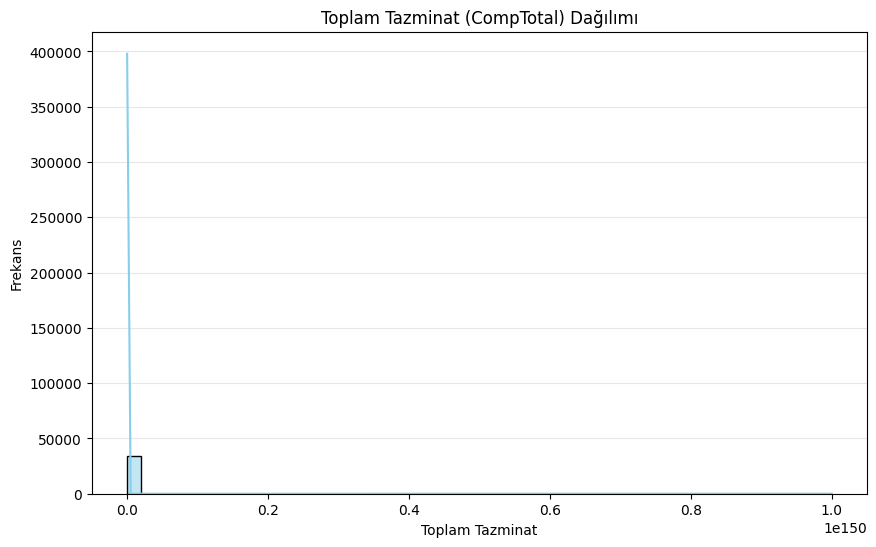

In [24]:
# Histogram, maaş verilerinin hangi aralıklarda yığıldığını görmemizi sağlar.

import matplotlib.pyplot as plt
import seaborn as sns

# 1. SQL sorgusu ile CompTotal verilerini çekelim (Boş olmayanları alıyoruz)
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp['CompTotal'].head(20))

# 2. Görselleştirme
plt.figure(figsize=(10, 6))
# Bins sayısını 50 yaparak dağılımı daha detaylı görelim
sns.histplot(df_comp['CompTotal'], bins=50, kde=True, color='skyblue')

plt.title('Toplam Tazminat (CompTotal) Dağılımı')
plt.xlabel('Toplam Tazminat')
plt.ylabel('Frekans')
plt.grid(axis='y', alpha=0.3)
plt.show()

Çünkü CompTotal sütunu "Yerel Para Birimi" (Currency) cinsindendir. Biri yıllık 28 bin Dolar kazanırken, diğeri yıllık 2 milyon Hindistan Rupisi veya Japon Yeni kazanıyor olabilir.  biz analizlerimizde hep ConvertedCompYearly (Dolar'a çevrilmiş hali) sütununu kullanmalıyız. bu devasa farklar yüzünden histogramın "tek bir ince çizgi" gibi görünmesi normaldir.

***Kutu Grafikleri***

Yaş değişkeninin kutu grafiğini çizin.

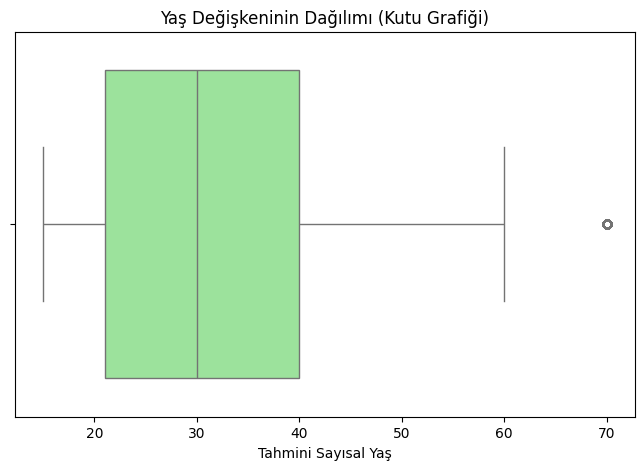

In [28]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veritabanına bağlanalım
conn = sqlite3.connect('survey-data.sqlite')

# 2. Veritabanından Age sütununu çekip 'df_age_only' değişkenine atayalım
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"
df_age_only = pd.read_sql_query(QUERY, conn)

# 3. Metin olan yaşları sayıya çevirmek için sözlük (mapping) oluşturalım
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# 4. Sayısal sütunu oluşturalım
df_age_only['Age_Numeric'] = df_age_only['Age'].map(age_mapping)

# 5. Görselleştirme: İşte istediğin Kutu Grafiği (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_age_only['Age_Numeric'], color='lightgreen')

plt.title('Yaş Değişkeninin Dağılımı (Kutu Grafiği)')
plt.xlabel('Tahmini Sayısal Yaş')
plt.show()

# Sorgu bitti, bağlantıyı kapatalım (İsteğe bağlı)
# conn.close()

# Verilerdeki İlişkileri Görselleştirme¶
Dağılım Grafikleri

Yaş ve İş Deneyimi değişkenlerinin dağılım grafiğini oluşturun.

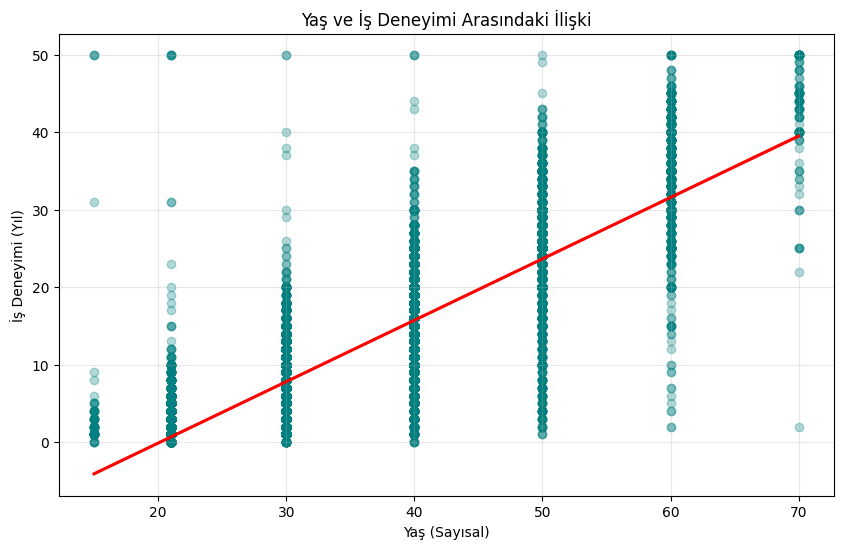

In [30]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Veritabanına bağlanalım
conn = sqlite3.connect('survey-data.sqlite')

# 1. Görev: Yaş ve İş Deneyimi verilerini çekelim
QUERY = """
SELECT Age, WorkExp 
FROM main 
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
df_scatter = pd.read_sql_query(QUERY, conn)

# Yaşları metinden sayıya çevirelim (Sıralı bir görünüm için)
age_mapping = {'Under 18 years old': 15, '18-24 years old': 21, '25-34 years old': 30, 
               '35-44 years old': 40, '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70}
df_scatter['Age_Numeric'] = df_scatter['Age'].map(age_mapping)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.regplot(x='Age_Numeric', y='WorkExp', data=df_scatter, 
            scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'red'})

plt.title('Yaş ve İş Deneyimi Arasındaki İlişki')
plt.xlabel('Yaş (Sayısal)')
plt.ylabel('İş Deneyimi (Yıl)')
plt.grid(True, alpha=0.3)
plt.show()

# Balon Grafikleri

Yaş sütununu balon boyutu olarak kullanarak Zaman Arama(TimeSearching) ve Hayal Kırıklığı(Frustration) değişkenlerinin balon grafiğini oluşturun.

In [50]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Veritabanı bağlantısı
conn = sqlite3.connect('survey-data.sqlite')

# Gerekli 3 sütunu çekiyoruz
QUERY = "SELECT Age, TimeSearching, Frustration FROM main WHERE Age IS NOT NULL"
df_bubble = pd.read_sql_query(QUERY, conn)

# --- İSTEDİĞİN KONTROL ---
print("--- Frustration Sütunu İlk 100 Satır Örneği ---")
print(df_bubble['Frustration'].head(100)) 
# Burada göreceğin şey; aralarında ';' olan uzun cümleler olacak.

--- Frustration Sütunu İlk 100 Satır Örneği ---
0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
95    Amount of technical debt;Showing my contributi...
96    Amount of technical debt;Tracking my work;Show...
97                                                  NaN
98    Tracking my work;Complexity of tech stack for ...
99                                                  NaN
Name: Frustration, Length: 100, dtype: str


0        0
1        0
2        0
3        0
4        0
        ..
65432    0
65433    0
65434    0
65435    0
65436    0
Name: Frust_Score, Length: 65437, dtype: int64


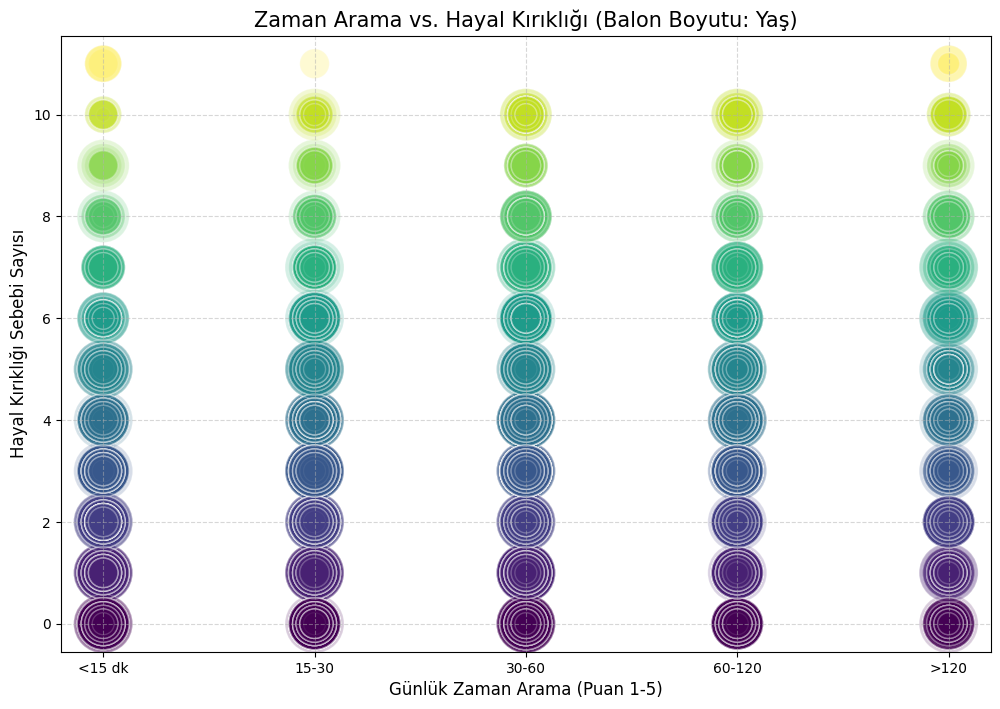

In [54]:
# 1. Yaş Mapping (Balon boyutu için)
age_map = {'Under 18 years old': 10, '18-24 years old': 25, '25-34 years old': 45, 
           '35-44 years old': 70, '45-54 years old': 100, '55-64 years old': 140, '65 years or older': 180}
df_bubble['Age_Size'] = df_bubble['Age'].map(age_map)

# 2. TimeSearching Mapping (X ekseni) - "a day" ekine dikkat!
time_map = {
    'Less than 15 minutes a day': 1, '15-30 minutes a day': 2, 
    '30-60 minutes a day': 3, '60-120 minutes a day': 4, 'Over 120 minutes a day': 5
}
df_bubble['Time_Score'] = df_bubble['TimeSearching'].map(time_map)

# 3. Frustration Puanlama (Y ekseni)
# Mantık: Noktalı virgülleri say, kaç tane hayal kırıklığı nedeni varsa o kadar puan!
df_bubble['Frust_Score'] = df_bubble['Frustration'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) and x != 'None of these' else 0)
print(df_bubble['Frust_Score'])

# Boş kalanları (NaN) temizle
df_final = df_bubble.dropna(subset=['Time_Score', 'Frust_Score', 'Age_Size'])

# 4. GÖRSELLEŞTİRME
plt.figure(figsize=(12, 8))
# s = balon boyutu, c = renk (puan arttıkça renk değişsin)
plt.scatter(x=df_final['Time_Score'], 
            y=df_final['Frust_Score'], 
            s=df_final['Age_Size'] * 10, # Yaşlıların balonu daha büyük görünecek
            alpha=0.2, 
            c=df_final['Frust_Score'], 
            cmap='viridis', 
            edgecolors='white')

plt.title('Zaman Arama vs. Hayal Kırıklığı (Balon Boyutu: Yaş)', fontsize=15)
plt.xlabel('Günlük Zaman Arama (Puan 1-5)', fontsize=12)
plt.ylabel('Hayal Kırıklığı Sebebi Sayısı', fontsize=12)
plt.xticks([1, 2, 3, 4, 5], ['<15 dk', '15-30', '30-60', '60-120', '>120'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Veri Bileşiminin Görselleştirilmesi
# Pasta Grafikleri

Katılımcıların gelecek yıl öğrenmek istedikleri ilk 5 veritabanının (DatabaseWantToWorkWith) pasta grafiğini oluşturun.

PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


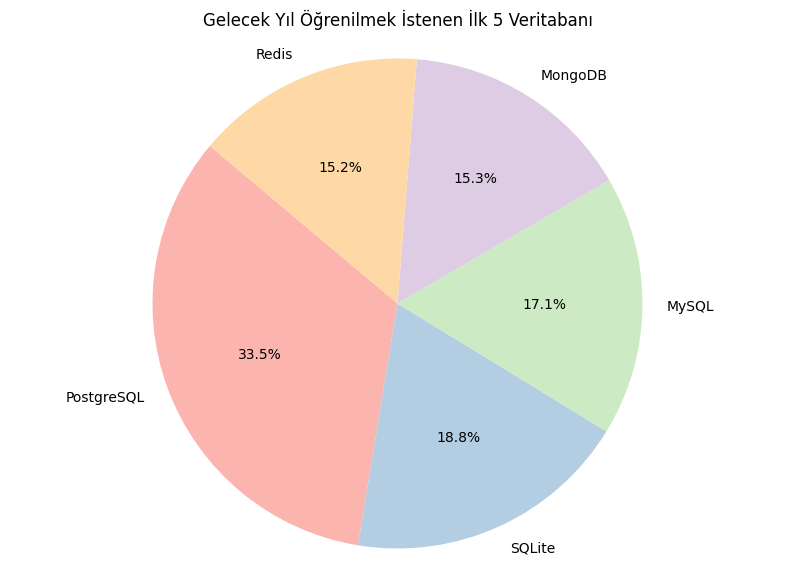

In [57]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Veritabanına bağlan
conn = sqlite3.connect('survey-data.sqlite')

# 1. Veriyi çekelim
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df_db = pd.read_sql_query(QUERY, conn)

# 2. Noktalı virgülle ayrılmış veritabanlarını tek tek sayalım
db_counts = df_db['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
df_top5_db = db_counts.head(5)
print(df_top5_db)

# 3. Görselleştirme: Pasta Grafiği
plt.figure(figsize=(10, 7))
plt.pie(df_top5_db, labels=df_top5_db.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)

plt.title('Gelecek Yıl Öğrenilmek İstenen İlk 5 Veritabanı')
plt.axis('equal') # Pastanın yuvarlak görünmesini sağlar
plt.show()

# Yığılmış Grafikler

30-35 yaş grubu için Arama Süresi ve Cevaplama Süresi medyan değerlerinin yığılmış çubuk grafiğini oluşturun.

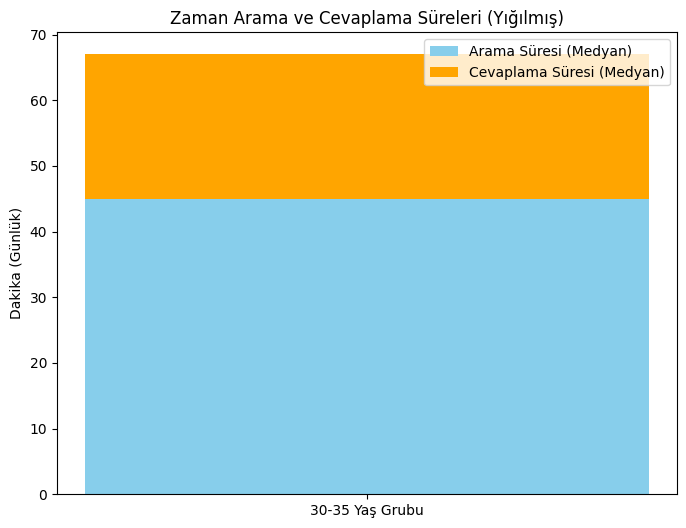

In [58]:
# 1. 30-35 yaş grubundaki verileri çekelim
QUERY = """
SELECT TimeSearching, TimeAnswering 
FROM main 
WHERE Age = '25-34 years old' OR Age = '35-44 years old'
"""
# Not: Veri setinde tam "30-35" grubu yoksa en yakın grupları alıyoruz.
df_time = pd.read_sql_query(QUERY, conn)

# 2. Metinleri sayıya çevirme (Örnek eşleştirme)
time_map = {
    'Less than 15 minutes a day': 7, 
    '15-30 minutes a day': 22, 
    '30-60 minutes a day': 45, 
    '60-120 minutes a day': 90, 
    'Over 120 minutes a day': 150
}

df_time['Search_Num'] = df_time['TimeSearching'].map(time_map)
df_time['Answer_Num'] = df_time['TimeAnswering'].map(time_map)

# 3. Medyan değerlerini hesaplayalım
median_search = df_time['Search_Num'].median()
median_answer = df_time['Answer_Num'].median()

# 4. Görselleştirme: Yığılmış Çubuk Grafik (Stacked Bar)
plt.figure(figsize=(8, 6))

plt.bar('30-35 Yaş Grubu', median_search, color='skyblue', label='Arama Süresi (Medyan)')
plt.bar('30-35 Yaş Grubu', median_answer, bottom=median_search, color='orange', label='Cevaplama Süresi (Medyan)')
#bottom=median_search parametresi çok kritiktir; ikinci çubuğun ilkinin bittiği yerden başlamasını sağlayarak "yığılma" etkisini yaratır.

plt.ylabel('Dakika (Günlük)')
plt.title('Zaman Arama ve Cevaplama Süreleri (Yığılmış)')
plt.legend()
plt.show()

In [61]:
# bottom=median_search parametresi çok kritiktir; ikinci çubuğun ilkinin bittiği yerden başlamasını sağlayarak "yığılma" etkisini yaratır.

# Verilerin Karşılaştırılmasının Görselleştirilmesi
# Çizgi Grafiği

45 ila 60 yaş arası tüm yaş grupları için ortanca CompTotal değerini grafiğe çizin.

               Age  CompTotal
0  45-54 years old   130000.0
1  55-64 years old   135000.0


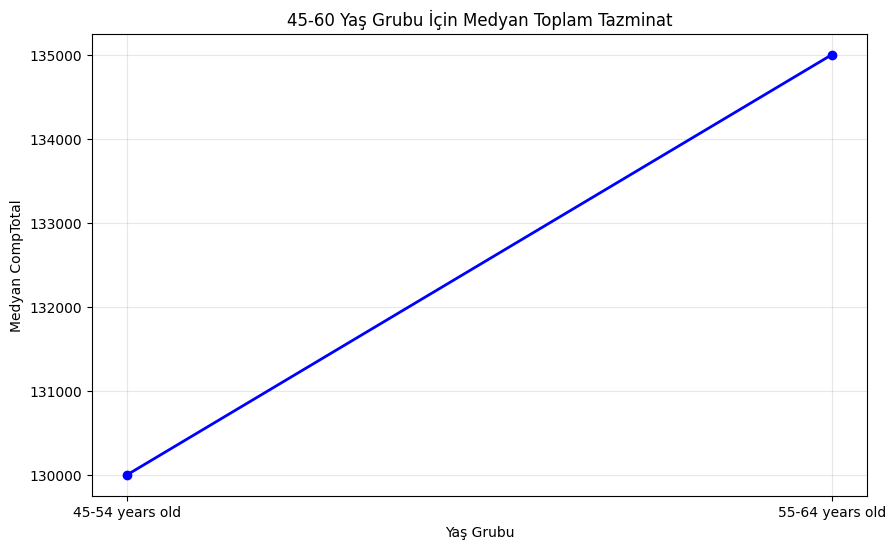

In [64]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# 1. SQL ile 45-60 yaş aralığına denk gelen grupları çekelim
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IN ('45-54 years old', '55-64 years old') 
AND CompTotal IS NOT NULL
"""
df_line = pd.read_sql_query(QUERY, conn)

# 2. Yaş gruplarına göre medyan hesaplayalım
line_data = df_line.groupby('Age')['CompTotal'].median().reset_index()
print(line_data)

# 3. Görselleştirme: Çizgi Grafik
plt.figure(figsize=(10, 6))
plt.plot(line_data['Age'], line_data['CompTotal'], marker='o', linestyle='-', color='blue', linewidth=2)

plt.title('45-60 Yaş Grubu İçin Medyan Toplam Tazminat')
plt.xlabel('Yaş Grubu')
plt.ylabel('Medyan CompTotal')
plt.grid(True, alpha=0.3)
plt.show()

# Çubuk Grafik

Ana Dal sütununu kullanarak yatay bir çubuk grafik oluşturun.
katılımcının profesyonel geliştirici mi yoksa öğrenci

                                          MainBranch  Count
0                     I am a developer by profession  50207
1  I am not primarily a developer, but I write co...   6511
2                              I am learning to code   3875
3                        I code primarily as a hobby   3334
4  I used to be a developer by profession, but no...   1510


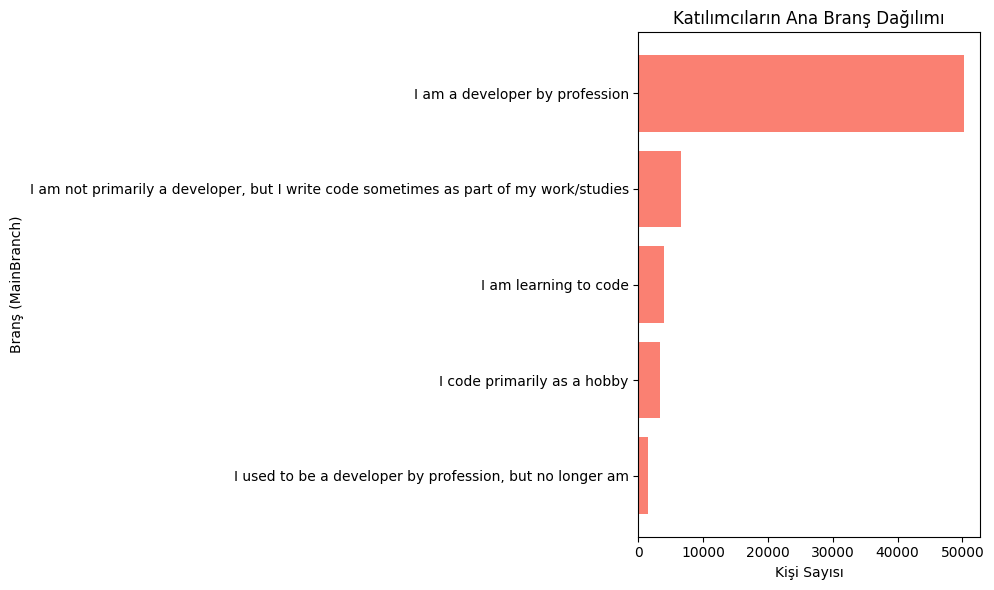

In [67]:
# 1. MainBranch verilerini ve sayılarını çekelim
QUERY = """
SELECT MainBranch, COUNT(*) as Count 
FROM main 
GROUP BY MainBranch 
ORDER BY Count DESC
"""
df_branch = pd.read_sql_query(QUERY, conn)
print(df_branch)

# 2. Görselleştirme: Yatay Çubuk Grafik
plt.figure(figsize=(10, 6))
plt.barh(df_branch['MainBranch'], df_branch['Count'], color='salmon')

plt.title('Katılımcıların Ana Branş Dağılımı')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Branş (MainBranch)')
plt.gca().invert_yaxis() # En yüksek olanı en üstte gösterir
plt.tight_layout()
plt.show()



In [ ]:
# Tüm grafikler bitti kapatalım
conn.close()

# Özet
Bu laboratuvar çalışmasında, SQL sorguları ve SQLite kullanarak bir RDBMS'den veri çıkarma ve görselleştirmeye odaklandınız. Aşağıdakiler de dahil olmak üzere çeşitli görselleştirme teknikleri uyguladınız:

- CompTotal'ın dağılımını göstermek için histogramlar.

- Yaş dağılımını göstermek için kutu grafikleri.

- Yaş, İş Deneyimi, Arama Süresi ve Cevaplama Süresi gibi değişkenler arasındaki ilişkileri incelemek için dağılım grafikleri ve baloncuk grafikleri.

- Verilerin bileşimini görselleştirmek için pasta grafikleri ve yığılmış grafikler.

- Kategoriler arasında verileri karşılaştırmak için çizgi grafikleri ve çubuk grafikler.

In [ ]:
#veri deki değiştirdiğimiz tümler

In [68]:
import pandas as pd
import sqlite3

# 1. Veriyi Yükleyelim
# Eğer CSV'den :  df = pd.read_csv('survey-data.csv')
# Eğer SQL'den başlıyorsan:
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT * FROM main", conn)

print("Temizlik başlıyor...")

# --- DÖNÜŞÜM 1: YAŞ (Metinden Sayıya) ---
age_map = {
    'Under 18 years old': 15, '18-24 years old': 21, '25-34 years old': 30, 
    '35-44 years old': 40, '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_map)

# --- DÖNÜŞÜM 2: ZAMAN (Metinden Sayıya) ---
# " a day" ekini de kapsayacak şekilde güvenli mapping
time_map = {
    'Less than 15 minutes a day': 1, '15-30 minutes a day': 2, 
    '30-60 minutes a day': 3, '60-120 minutes a day': 4, 'Over 120 minutes a day': 5
}
df['TimeSearching_Score'] = df['TimeSearching'].map(time_map)
df['TimeAnswering_Score'] = df['TimeAnswering'].map(time_map)

# --- DÖNÜŞÜM 3: HAYAL KIRIKLIĞI (Neden Sayısı) ---
def count_frustration(text):
    if pd.isna(text) or text == 'None of these':
        return 0
    return text.count(';') + 1

df['Frust_Score'] = df['Frustration'].apply(count_frustration)

# --- KAYDETME AŞAMASI ---

# A. SQL Veritabanına yeni bir tablo olarak kaydedelim (Artık hep bunu kullanabilirim)
df.to_sql('main_cleaned', conn, if_exists='replace', index=False)

# B. CSV olarak dışarı aktar (Excel'de bakmak istersen)
df.to_csv('survey_data_final_cleaned.csv', index=False)

print("İşlem Tamam!")
print("- Yeni SQL tablosu: 'main_cleaned'")
print("- Yeni CSV dosyası: 'survey_data_final_cleaned.csv'")

# Bağlantıyı kapatalım
conn.close()

Temizlik başlıyor...
İşlem Tamam!
- Yeni SQL tablosu: 'main_cleaned'
- Yeni CSV dosyası: 'survey_data_final_cleaned.csv'
